In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import timeit

In [ ]:
start = timeit.default_timer()

stop = timeit.default_timer()
print('Time: ', stop - start)  

In [ ]:
def read

In [71]:
def readCategory(path:str, sheet_name:str, category: list, num_rows: int = None):
    df = pd.read_excel(path, header=0, index_col= 0 ,sheet_name = sheet_name, usecols = category)
    df.to_csv (path +".csv", 
                  index = None,
                  header=True)
    df = pd.DataFrame(pd.read_csv(path +".csv"))
    return df.head(num_rows)

In [74]:
os.listdir("Data Source")

['REference 240Hz data',
 'Reference downsampled data',
 'Student 240Hzdata',
 'Student downsampled data']

In [78]:
reference = r"Data Source/Reference downsampled data/Simulator riding/Reference Harjusimu-003 Extended walk.xlsx"
sheet_name = "Joint Angles ZXY"
category = ["Frame", "L5S1 Lateral Bending"]
# num_rows = 5
reference_df = readCategory(reference, sheet_name, category)
reference_df

,L5S1 Lateral Bending
0,1.708588
1,1.781752
2,1.881491
3,1.979502
4,2.097826
...,...
1439,2.711587
1440,2.817411
1441,2.836582
1442,2.808934


In [80]:
student = r"Data Source/Student downsampled data/simulator riding/Sudent1-003Harju ext walk.xlsx"
sheet_name = "Joint Angles ZXY"
category = ["Frame", "L5S1 Lateral Bending"]
# num_rows = 10

student_df = readCategory(student,sheet_name, category)
student_df

,L5S1 Lateral Bending
0,1.590306
1,1.347626
2,1.046757
3,0.789460
4,0.605491
...,...
1439,0.494331
1440,0.640011
1441,0.799366
1442,0.950645


In [101]:
def ComparisionGraph(dataframes: list, dataframe_names: list[str], title: str, x_labels: list, y_labels: list):
    fig = plt.figure()
    fig, ax = plt.subplots()
    for (dataframe, dataframe_name, x_label, y_label) in zip(dataframes, dataframe_names, x_labels, y_labels):
        ax.plot(dataframe, label= dataframe_name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(title)
        ax.legend()
    return fig

<Figure size 640x480 with 0 Axes>

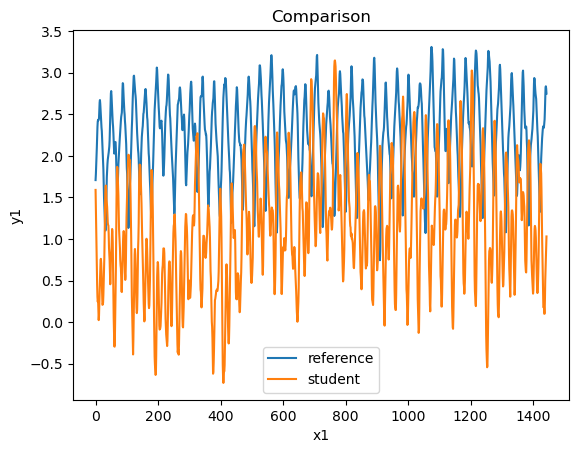

In [102]:
fig = ComparisionGraph([reference_df, student_df],['reference', 'student'], "Comparison", ["x", "x1"] , ["y","y1"])
plt.show()

In [84]:
reference_df.describe()

,L5S1 Lateral Bending
count,1444.000000
mean,2.253972
std,0.500848
min,0.744588
25%,1.881268
50%,2.297043
75%,2.655784
max,3.310494


In [120]:
student_df.describe()

,L5S1 Lateral Bending
count,1444.000000
mean,1.101402
std,0.721907
min,-0.731411
25%,0.587787
50%,1.078144
75%,1.583688
max,3.148280


In [126]:
student_df.describe().min()

L5S1 Lateral Bending   -0.731411
dtype: float64

In [128]:
def OutputCriticalValues(dataframe):
#     minimun_value = dataframe[category].describe().loc['min']
#     maximum_value = dataframe[category].describe().loc['max']
#     threshold = dataframe[category].describe().loc['mean'] 
    critical_value = {
        "minimun_value": dataframe.describe().loc['min'],
        "maximum_value": dataframe.describe().loc['max'],
        "threshold": dataframe.describe().loc['mean']
    }
    return critical_value

In [129]:
critical_value = OutputCriticalValues(student_df)
print("min:", critical_value["minimun_value"])
print("max:", critical_value["maximum_value"])
print("threshold:", critical_value["threshold"])

min: L5S1 Lateral Bending   -0.731411
Name: min, dtype: float64
max: L5S1 Lateral Bending    3.14828
Name: max, dtype: float64
threshold: L5S1 Lateral Bending    1.101402
Name: mean, dtype: float64


In [123]:
student_df_copy = student_df.copy()
student_df_copy["Status"] = student_df_copy["L5S1 Lateral Bending"].apply(lambda x: "low" if x < reference_threshold else "high")

NameError: name 'reference_threshold' is not defined

In [ ]:
student_df_category.head(80)

In [ ]:
data = student_df_category["Status"].value_counts()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data,colors = colors, labels = data.index, autopct = '%.0f%%', )
plt.show()